# LOGISTIC with Chat GPT
> biceps

In [55]:
# Import the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import os


In [56]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/artabax/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/artabax/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/'

In [57]:

# Load the dataset into a pandas DataFrame
df = pd.read_csv(path+'Gdrive_csv/20221228_0104AM_shoulderfly.csv')
#df_raw.set_index('Time', inplace=True)
df


,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,totacc,status,mov,prob
0,1672185745474,-8.356223,-3.820056,2.550696,-2.939999,1.819999,-1.959999,23.616635,-73.025449,-0.050537,9.535478,0,NaN,0
1,1672185745581,-8.576566,-3.867957,2.775828,-0.140000,2.309999,-1.609999,23.223094,-72.065692,-0.012207,9.809372,0,NaN,0
2,1672185745689,-8.464000,-3.798501,2.761458,0.840000,-0.980000,-1.260000,23.105517,-71.930609,-0.021484,9.679543,0,NaN,0
3,1672185745798,-8.449629,-3.884722,2.684817,1.330000,-2.099999,0.210000,23.661283,-72.372669,0.013672,9.679645,0,NaN,0
4,1672185745907,-8.408914,-4.006868,2.713557,1.399999,0.280000,2.449999,24.393135,-72.115105,-0.008057,9.701969,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,1672185808085,-6.871311,-6.631809,2.332749,0.420000,4.339998,-0.980000,42.424636,-71.248106,-0.184814,9.830439,0,NaN,0
588,1672185808190,-6.813831,-6.713240,2.318379,-0.280000,-0.140000,-0.070000,43.006458,-71.209332,-0.144043,9.842295,0,NaN,0
589,1672185808296,-6.730005,-6.780301,2.090852,0.490000,-2.099999,1.330000,43.893748,-72.741227,-0.145508,9.779423,0,NaN,0
590,1672185808402,-6.631809,-6.773116,1.937571,-0.630000,-1.330000,0.070000,44.430746,-73.713577,-0.130615,9.675235,0,NaN,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  592 non-null    int64  
 1   ax         592 non-null    float64
 2   ay         592 non-null    float64
 3   az         592 non-null    float64
 4   gx         592 non-null    float64
 5   gy         592 non-null    float64
 6   gz         592 non-null    float64
 7   pitch      592 non-null    float64
 8   roll       592 non-null    float64
 9   BAR        592 non-null    float64
 10  totacc     592 non-null    float64
 11  status     592 non-null    int64  
 12  mov        0 non-null      float64
 13  prob       592 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 64.9 KB


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the columns containing the features
X = df[['ax', 'ay', 'az', 'gx', 'gy', 'gz','pitch','roll', 'BAR','totacc' ]]

# Select the column containing the labels (0 for non-rep, 1 for rep)
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


from sklearn.metrics import accuracy_score, precision_score, recall_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 96.64%
Accuracy: 0.9663865546218487
Precision: 0.9722222222222222
Recall: 0.9210526315789473


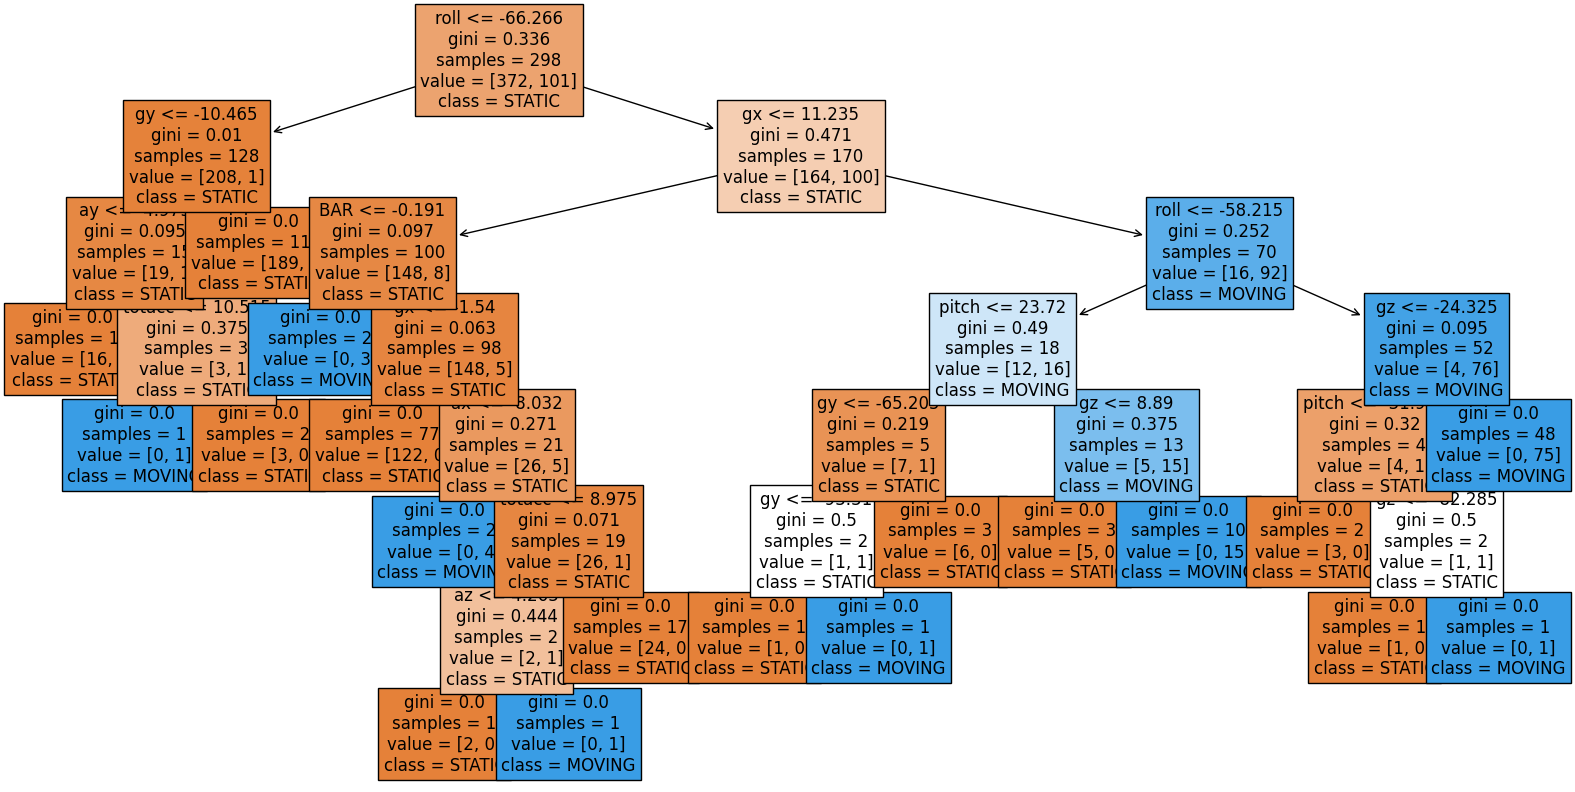

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree in the random forest
tree = model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['STATIC', 'MOVING'], filled=True, fontsize=12)
plt.show()

# LOGISTIC REGRESSION

In [61]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 97.48%
Accuracy: 0.9747899159663865
Precision: 0.967741935483871
Recall: 0.9375


> PESI

In [62]:
# Print the weights (coefficients) for each feature with their corresponding labels (feature names)
for feature, coef in zip(X.columns, model.coef_[0]):
    print('{}: {}'.format(feature, coef))
print("b0",model.intercept_)

ax: -0.15547909422536585
ay: -0.7677767250114029
az: 0.9891189059827034
gx: 0.020833750247921175
gy: -0.03895639615522867
gz: 0.03171187591468352
pitch: -0.060335439190927105
roll: 0.01757218846756117
BAR: -0.11841109517152397
totacc: -0.9305081859377519
b0 [0.39065641]


## CONFUSION COLORED MATRIX

        Logistic
Reg             
az      0.989119
totacc -0.930508
ay     -0.767777
ax     -0.155479
BAR    -0.118411
pitch  -0.060335
gy     -0.038956
gz      0.031712
gx      0.020834
roll    0.017572
b0: 0.3906564058833872


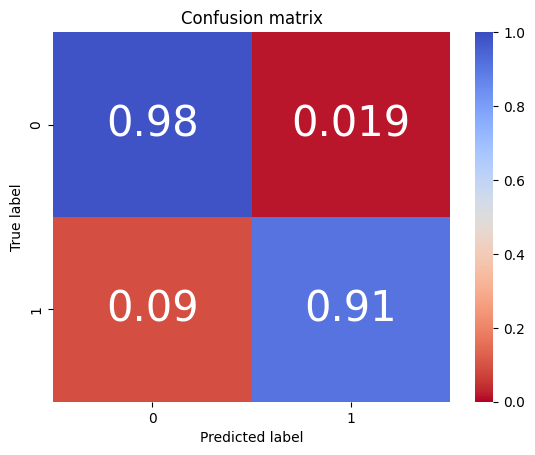

In [63]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
import seaborn as sns


log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

intercept = str(model.intercept_)[1:-1]

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

LogReg Training Accuracy is:  0.9640591966173362
LogReg Testing Accuracy is:  0.9747899159663865


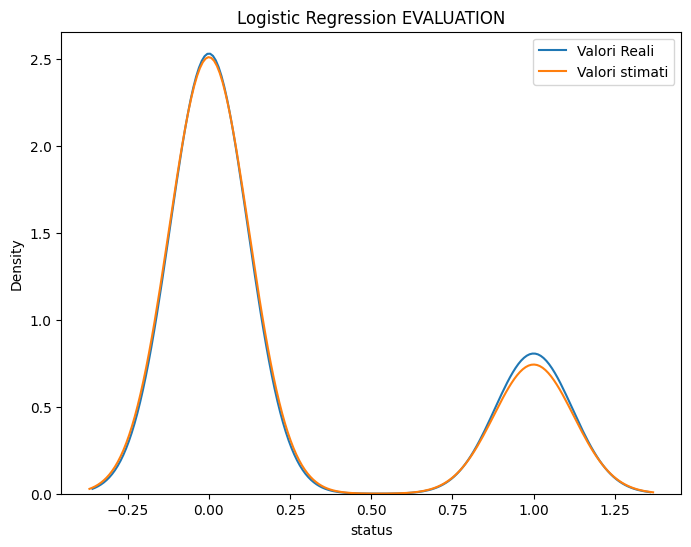

In [64]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION')
sns.kdeplot(data=df, x='status' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()

In [65]:
import csv

# Create a list of tuples to hold the feature names and coefficients
coefficients = []
for feature, coef in zip(X.columns, model.coef_[0]):
    coefficients.append((feature, coef))

# Append the intercept to the list of coefficients
coefficients.append(('intercept', intercept))

# Specify the full path to the directory where you want to save the file
directory = '/Users/paoloartasensi/Python_Scripts/artabax/Gdrive_csv/'

# Open a file for writing in 'w' mode (overwrites the file if it already exists)
with open(directory + 'coefficients.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['feature', 'coefficient'])

    # Write the rows for the coefficients
    for feature, coef in coefficients:
        writer.writerow([feature, coef])
